In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa 
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Audio params
SAMPLE_RATE = 16000 # 這個參數表示音訊的採樣率，即每秒採集的樣本數。在這個例子中，採樣率為 16000 Hz，表示每秒會有 16000 個樣本。
DURATION = 5.0 # duration in second # 這個參數表示音訊的持續時間，單位為秒。在這個例子中，音訊的持續時間為 5 秒。
AUDIO_LEN = int(SAMPLE_RATE * DURATION) 
# 這個參數計算了音訊數據的總長度，以樣本數表示。由於採樣率為 16000 Hz，持續時間為 5 秒，因此音訊數據的總長度為 16000 * 5 = 80000 個樣本。

# Spectrogram params
N_MELS = 128 # freq axis
N_FFT = 2048
SPEC_WIDTH = 256 # time axis
HOP_LEN = AUDIO_LEN//(SPEC_WIDTH - 1) # non-overlap region
FMAX = SAMPLE_RATE//2 # max frequency
SPEC_SHAPE = [SPEC_WIDTH, N_MELS] # output spectrogram shape

#### load Sample file

In [3]:
fp = './Sample.mp3'
audio , sr = librosa.load(fp, sr=SAMPLE_RATE)
ipd.Audio(audio, rate=sr)

#### Waveform 波形圖
將聲音變成人耳所聽到的數位訊號，以橫軸代表時間，縱軸代表振幅

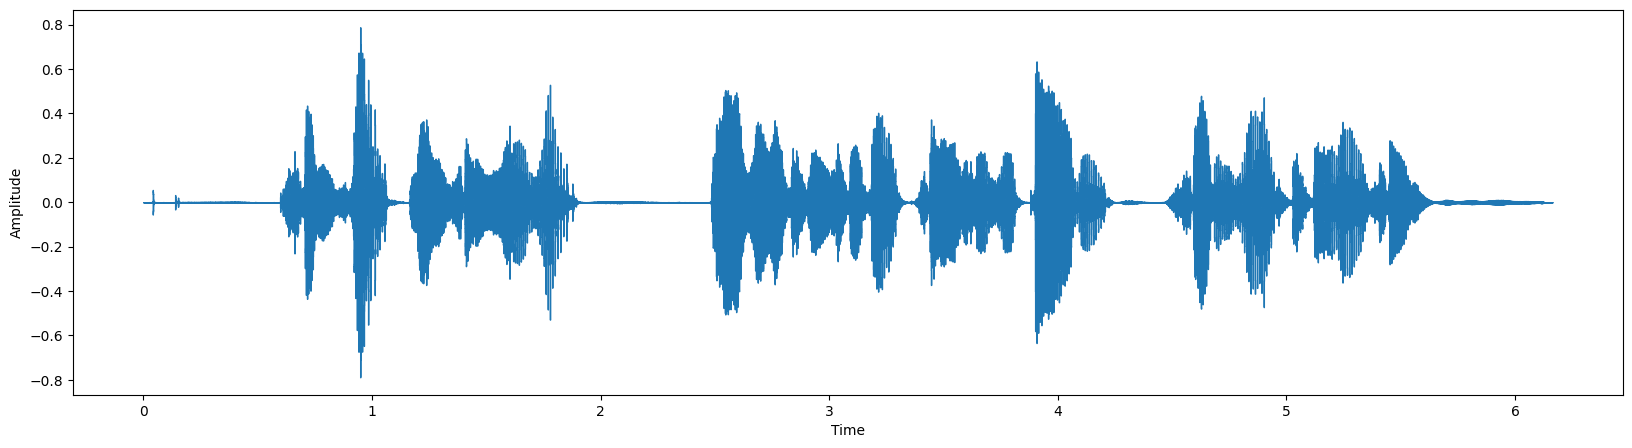

In [5]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(audio, sr = SAMPLE_RATE)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

#### Sound Spectrum
一種以橫軸為頻率(Hz)，縱軸為振幅(db)表示的圖表  
PS: 人耳能聽到的範圍是20Hz~20000Hz

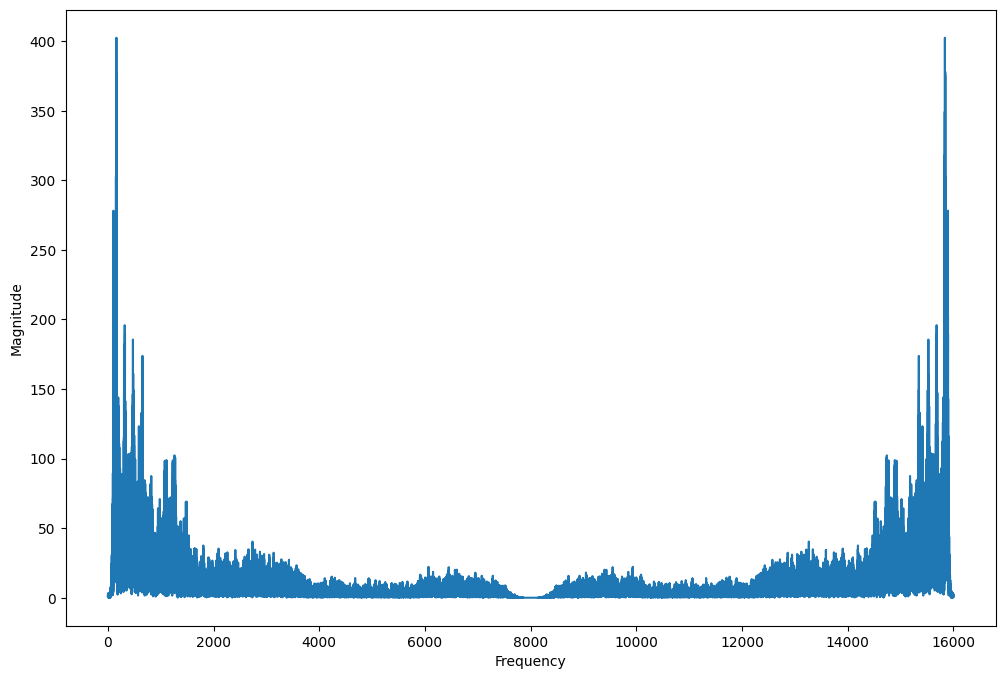

In [7]:
fft_audio = np.fft.fft(audio)
magnitude_healthy = np.abs(fft_audio)
# 用採樣點跟採樣頻率還原原始訊號(以頻率為x軸)
freq_healthy = np.linspace(0,SAMPLE_RATE, len(magnitude_healthy)) 

plt.figure(figsize=(12,8))
plt.plot(freq_healthy,magnitude_healthy)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

#### Spectrogram
橫軸為時間、縱軸為頻率、第三軸以顏色標示，可以看出某個時間下特定頻率的振幅。

Text(0.5, 1.0, 'Spectrogram')

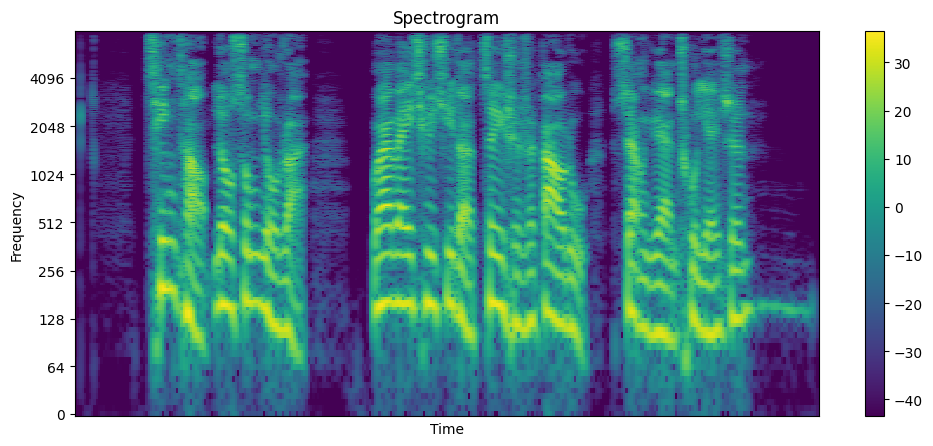

In [27]:
# perform stft
stft_healthy = librosa.stft(audio, n_fft=N_FFT, hop_length=HOP_LEN)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_healthy)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(12,5))
librosa.display.specshow(log_spectrogram, sr=SAMPLE_RATE, hop_length=HOP_LEN, y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("viridis")
plt.title("Spectrogram")

#### Mel-frequency spectrogram
Mel-frequency: 對人類耳朵能聽到為主進行處理，因為人耳所聽到的不是線性  
相關: MFCCs

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

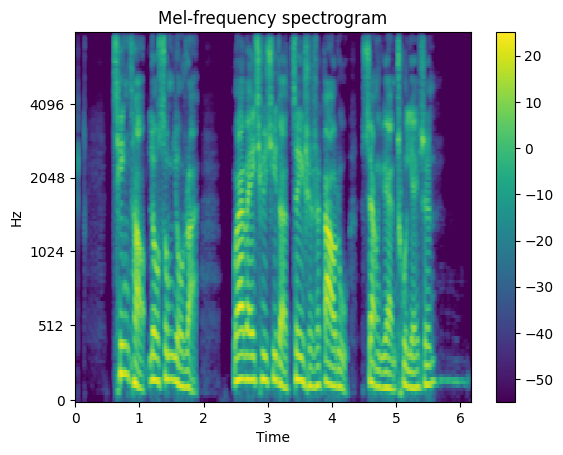

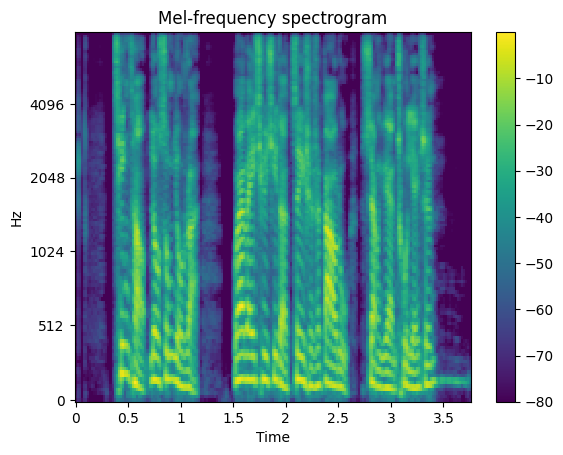

In [34]:
# 法一: 用時間序列去轉
spec = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, fmax=FMAX, n_mels=N_MELS, hop_length=HOP_LEN, n_fft=N_FFT)
spec = librosa.power_to_db(spec)
fig, ax = plt.subplots()
img = librosa.display.specshow(spec, x_axis='time', y_axis='mel', hop_length=HOP_LEN, sr=sr, fmax=FMAX, cmap='viridis')
fig.colorbar(img, ax=ax)
ax.set(title='Mel-frequency spectrogram')

# 法二: STFT去轉
D = np.abs(librosa.stft(audio))**2
S = librosa.feature.melspectrogram(S=D, sr=SAMPLE_RATE)
S_db = librosa.power_to_db(S, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='mel', hop_length=HOP_LEN, sr=SAMPLE_RATE, fmax=FMAX, cmap='viridis')
fig.colorbar(img, ax=ax)
ax.set(title='Mel-frequency spectrogram')